In [1]:
import pandas as pd

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("vaccination_tweets.csv")

In [6]:
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [7]:
df.isna().sum()

id                    0
user_name             0
user_location       798
user_description    236
user_created          0
user_followers        0
user_friends          0
user_favourites       0
user_verified         0
date                  0
text                  0
hashtags            981
source                1
retweets              0
favorites             0
is_retweet            0
dtype: int64

In [10]:
df.drop(['id', 'user_name','user_description','user_followers','user_friends','user_favourites','text','hashtags','favorites','is_retweet'], axis = 1, inplace = True)

In [11]:
df

,user_location,user_created,user_verified,date,source,retweets
0,"La Crescenta-Montrose, CA",2009-04-08 17:52:46,False,2020-12-20 06:06:44,Twitter for Android,0
1,"San Francisco, CA",2009-09-21 15:27:30,False,2020-12-13 16:27:13,Twitter Web App,1
2,Your Bed,2020-06-25 23:30:28,False,2020-12-12 20:33:45,Twitter for Android,0
3,"Vancouver, BC - Canada",2008-09-10 11:28:53,True,2020-12-12 20:23:59,Twitter Web App,446
4,NaN,2020-04-23 17:58:42,False,2020-12-12 20:17:19,Twitter for iPhone,0
...,...,...,...,...,...,...
3808,NaN,2018-03-11 18:16:22,False,2021-01-09 20:46:22,Twitter Web App,0
3809,"Tennessee, USA",2013-12-29 18:48:17,False,2021-01-09 20:41:05,Twitter for iPhone,0
3810,NaN,2018-03-11 18:16:22,False,2021-01-09 20:38:52,Twitter Web App,0
3811,Georgia,2009-06-22 22:18:16,False,2021-01-09 20:36:55,Twitter for iPhone,0


In [14]:
df.sort_values("user_created", inplace = True)

In [15]:
df

,user_location,user_created,user_verified,date,source,retweets
3586,"Sydney, New South Wales",2006-07-15 21:06:00,False,2021-01-11 21:23:04,Twitter for iPhone,0
515,Egypt,2007-01-06 21:21:50,False,2020-12-16 22:27:26,24liveblog,2
1813,Egypt,2007-01-06 21:21:50,False,2020-12-30 18:16:59,24liveblog,1
999,Egypt,2007-01-06 21:21:50,False,2020-12-21 11:39:47,24liveblog,0
1132,Egypt,2007-01-06 21:21:50,False,2020-12-24 18:52:43,24liveblog,0
...,...,...,...,...,...,...
3443,"Glasgow, Scotland",2021-01-06 16:52:40,False,2021-01-13 12:15:09,Twitter for Android,12
3531,NaN,2021-01-06 21:24:12,False,2021-01-12 16:59:39,Twitter for iPhone,0
3657,"Chino Hills, CA",2021-01-07 02:34:17,False,2021-01-11 04:25:14,Twitter for iPhone,0
3517,Tunisia,2021-01-07 07:50:04,False,2021-01-12 18:29:56,Twitter for Android,0


In [21]:
df['user_verified'].dtypes

dtype('bool')

In [27]:
df = df[df.user_verified == True]

In [30]:
df

,user_location,user_created,user_verified,date,source,retweets
1447,"Mumbai, India",2008-02-25 08:40:58,True,2020-12-22 09:02:35,Twitter for iPhone,0
2720,"Mumbai, India",2008-02-25 08:40:58,True,2021-01-08 03:26:07,TweetDeck,0
1884,Pakistan,2008-05-10 05:33:30,True,2020-12-30 06:12:42,TweetDeck,0
730,Houston & WPB via The Bronx,2008-06-30 06:20:41,True,2020-12-17 14:07:51,Twitter for iPhone,0
720,Boston,2008-08-12 16:28:07,True,2020-12-17 15:42:53,Twitter Web App,2
...,...,...,...,...,...,...
251,"309,B No 4, Emaar Busines Park",2020-06-25 15:35:43,True,2020-12-13 06:26:03,Twitter Web App,0
1527,"309,B No 4, Emaar Busines Park",2020-06-25 15:35:43,True,2020-12-21 20:29:47,Twitter Web App,5
1339,"309,B No 4, Emaar Busines Park",2020-06-25 15:35:43,True,2020-12-23 05:49:45,Twitter Web App,1
3166,Slovakia,2020-10-28 22:06:41,True,2021-01-15 17:40:37,Twitter for iPhone,2


In [31]:
df.rename(columns = {"date": "Tweet_Date"},  
          inplace = True)

C:\Users\tenth\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [32]:
df

,user_location,user_created,user_verified,Tweet_Date,source,retweets
1447,"Mumbai, India",2008-02-25 08:40:58,True,2020-12-22 09:02:35,Twitter for iPhone,0
2720,"Mumbai, India",2008-02-25 08:40:58,True,2021-01-08 03:26:07,TweetDeck,0
1884,Pakistan,2008-05-10 05:33:30,True,2020-12-30 06:12:42,TweetDeck,0
730,Houston & WPB via The Bronx,2008-06-30 06:20:41,True,2020-12-17 14:07:51,Twitter for iPhone,0
720,Boston,2008-08-12 16:28:07,True,2020-12-17 15:42:53,Twitter Web App,2
...,...,...,...,...,...,...
251,"309,B No 4, Emaar Busines Park",2020-06-25 15:35:43,True,2020-12-13 06:26:03,Twitter Web App,0
1527,"309,B No 4, Emaar Busines Park",2020-06-25 15:35:43,True,2020-12-21 20:29:47,Twitter Web App,5
1339,"309,B No 4, Emaar Busines Park",2020-06-25 15:35:43,True,2020-12-23 05:49:45,Twitter Web App,1
3166,Slovakia,2020-10-28 22:06:41,True,2021-01-15 17:40:37,Twitter for iPhone,2


In [38]:
df.sort_values(["retweets"], axis=0, 
                 ascending=[False], inplace=True) 

<ipython-input-38-ddf9a7d20ea0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(["retweets"], axis=0,


In [39]:
df

,user_location,user_created,user_verified,Tweet_Date,source,retweets
3,"Vancouver, BC - Canada",2008-09-10 11:28:53,True,2020-12-12 20:23:59,Twitter Web App,446
183,"Oakville, Ontario",2012-02-01 13:38:10,True,2020-12-14 01:00:18,Twitter for iPhone,284
3771,"Oakville, Ontario",2012-02-01 13:38:10,True,2021-01-10 00:46:59,Twitter for iPhone,230
2834,"London, England",2009-12-09 20:08:47,True,2021-01-09 15:00:43,Twitter for iPhone,199
922,"New York, USA",2009-04-05 23:54:55,True,2020-12-20 00:40:01,Buffer,176
...,...,...,...,...,...,...
1452,India,2011-11-02 20:46:16,True,2020-12-22 08:49:41,Echobox,0
1054,India,2011-11-02 20:46:16,True,2020-12-20 11:22:22,Twitter Web App,0
2101,India,2011-11-02 20:46:16,True,2021-01-01 04:21:35,Twitter Web App,0
3160,Saskatoon,2011-11-15 17:17:13,True,2021-01-15 18:05:16,Twitter Web App,0


In [43]:
df.dtypes

user_location    object
user_created     object
user_verified      bool
Tweet_Date       object
source           object
retweets          int64
dtype: object

In [47]:
df["Tweet_Date"] = pd.to_datetime(df["Tweet_Date"])

<ipython-input-47-74465a1c64aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Tweet_Date"] = pd.to_datetime(df["Tweet_Date"])


In [48]:
df["Tweet_Date"]

3      2020-12-12 20:23:59
183    2020-12-14 01:00:18
3771   2021-01-10 00:46:59
2834   2021-01-09 15:00:43
922    2020-12-20 00:40:01
               ...        
1452   2020-12-22 08:49:41
1054   2020-12-20 11:22:22
2101   2021-01-01 04:21:35
3160   2021-01-15 18:05:16
1429   2020-12-22 12:29:30
Name: Tweet_Date, Length: 440, dtype: datetime64[ns]

In [49]:
df['new_date'] = [d.date() for d in df['Tweet_Date']]
df['new_time'] = [d.time() for d in df['Tweet_Date']]

<ipython-input-49-cfa7b68526e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_date'] = [d.date() for d in df['Tweet_Date']]
<ipython-input-49-cfa7b68526e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_time'] = [d.time() for d in df['Tweet_Date']]


In [51]:
df

,user_location,user_created,user_verified,Tweet_Date,source,retweets,new_date,new_time
3,"Vancouver, BC - Canada",2008-09-10 11:28:53,True,2020-12-12 20:23:59,Twitter Web App,446,2020-12-12,20:23:59
183,"Oakville, Ontario",2012-02-01 13:38:10,True,2020-12-14 01:00:18,Twitter for iPhone,284,2020-12-14,01:00:18
3771,"Oakville, Ontario",2012-02-01 13:38:10,True,2021-01-10 00:46:59,Twitter for iPhone,230,2021-01-10,00:46:59
2834,"London, England",2009-12-09 20:08:47,True,2021-01-09 15:00:43,Twitter for iPhone,199,2021-01-09,15:00:43
922,"New York, USA",2009-04-05 23:54:55,True,2020-12-20 00:40:01,Buffer,176,2020-12-20,00:40:01
...,...,...,...,...,...,...,...,...
1452,India,2011-11-02 20:46:16,True,2020-12-22 08:49:41,Echobox,0,2020-12-22,08:49:41
1054,India,2011-11-02 20:46:16,True,2020-12-20 11:22:22,Twitter Web App,0,2020-12-20,11:22:22
2101,India,2011-11-02 20:46:16,True,2021-01-01 04:21:35,Twitter Web App,0,2021-01-01,04:21:35
3160,Saskatoon,2011-11-15 17:17:13,True,2021-01-15 18:05:16,Twitter Web App,0,2021-01-15,18:05:16


In [53]:
df.drop(['Tweet_Date'], axis = 1, inplace = True)

C:\Users\tenth\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [54]:
df

,user_location,user_created,user_verified,source,retweets,new_date,new_time
3,"Vancouver, BC - Canada",2008-09-10 11:28:53,True,Twitter Web App,446,2020-12-12,20:23:59
183,"Oakville, Ontario",2012-02-01 13:38:10,True,Twitter for iPhone,284,2020-12-14,01:00:18
3771,"Oakville, Ontario",2012-02-01 13:38:10,True,Twitter for iPhone,230,2021-01-10,00:46:59
2834,"London, England",2009-12-09 20:08:47,True,Twitter for iPhone,199,2021-01-09,15:00:43
922,"New York, USA",2009-04-05 23:54:55,True,Buffer,176,2020-12-20,00:40:01
...,...,...,...,...,...,...,...
1452,India,2011-11-02 20:46:16,True,Echobox,0,2020-12-22,08:49:41
1054,India,2011-11-02 20:46:16,True,Twitter Web App,0,2020-12-20,11:22:22
2101,India,2011-11-02 20:46:16,True,Twitter Web App,0,2021-01-01,04:21:35
3160,Saskatoon,2011-11-15 17:17:13,True,Twitter Web App,0,2021-01-15,18:05:16


In [55]:
df.rename(columns = {"new_date": "Tweet_Date" , "new_time": "Tweet_Time"},  
          inplace = True)

C:\Users\tenth\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [56]:
df

,user_location,user_created,user_verified,source,retweets,Tweet_Date,Tweet_Time
3,"Vancouver, BC - Canada",2008-09-10 11:28:53,True,Twitter Web App,446,2020-12-12,20:23:59
183,"Oakville, Ontario",2012-02-01 13:38:10,True,Twitter for iPhone,284,2020-12-14,01:00:18
3771,"Oakville, Ontario",2012-02-01 13:38:10,True,Twitter for iPhone,230,2021-01-10,00:46:59
2834,"London, England",2009-12-09 20:08:47,True,Twitter for iPhone,199,2021-01-09,15:00:43
922,"New York, USA",2009-04-05 23:54:55,True,Buffer,176,2020-12-20,00:40:01
...,...,...,...,...,...,...,...
1452,India,2011-11-02 20:46:16,True,Echobox,0,2020-12-22,08:49:41
1054,India,2011-11-02 20:46:16,True,Twitter Web App,0,2020-12-20,11:22:22
2101,India,2011-11-02 20:46:16,True,Twitter Web App,0,2021-01-01,04:21:35
3160,Saskatoon,2011-11-15 17:17:13,True,Twitter Web App,0,2021-01-15,18:05:16


In [58]:
df = df.nlargest(10, ['retweets']) 

In [59]:
df

,user_location,user_created,user_verified,source,retweets,Tweet_Date,Tweet_Time
3,"Vancouver, BC - Canada",2008-09-10 11:28:53,True,Twitter Web App,446,2020-12-12,20:23:59
183,"Oakville, Ontario",2012-02-01 13:38:10,True,Twitter for iPhone,284,2020-12-14,01:00:18
3771,"Oakville, Ontario",2012-02-01 13:38:10,True,Twitter for iPhone,230,2021-01-10,00:46:59
2834,"London, England",2009-12-09 20:08:47,True,Twitter for iPhone,199,2021-01-09,15:00:43
922,"New York, USA",2009-04-05 23:54:55,True,Buffer,176,2020-12-20,00:40:01
793,Nigeria,2010-02-24 10:39:37,True,Twitter for iPhone,115,2020-12-19,14:33:25
1591,"Vermont, USA",2014-01-14 21:31:32,True,Twitter for iPhone,80,2020-12-26,13:23:28
1393,"Dubai, United Arab Emirates",2011-12-08 17:40:27,True,Twitter for iPhone,62,2020-12-22,17:37:30
3230,Ireland,2009-03-01 19:44:11,True,Twitter for iPhone,53,2021-01-15,10:48:37
359,NaN,2019-03-25 04:14:29,True,Twitter for iPhone,51,2020-12-15,18:54:18


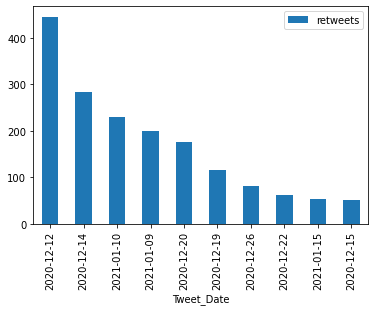

In [62]:
df.plot(x='Tweet_Date', y='retweets', kind='bar') 
plt.show()